In [2]:
import pandas as pd

df = pd.read_csv("fct_invoice.csv")
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
json_df = pd.read_json("dim_customer.json")
json_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [41]:
df["customer_id"].nunique()


5191

In [21]:
df["category"].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [4]:
df["category"].nunique()


8

In [42]:
df["payment_method"].unique()

array(['Credit Card', 'Debit Card', 'Cash'], dtype=object)

In [31]:
df["payment_method"].mode()

0    Cash
Name: payment_method, dtype: object

In [32]:
df["payment_method"].value_counts()

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

In [30]:
df.groupby('category').sum()['price']

/var/folders/z8/7nx5cpqj5tn9sp0zw5wt78b80000gn/T/ipykernel_28707/3452906630.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('category').sum()['price']


category
Books                226977.30
Clothing           31075684.64
Cosmetics           1848606.90
Food & Beverage      231568.71
Shoes              18135336.89
Souvenir             174436.83
Technology         15772050.00
Toys                1086704.64
Name: price, dtype: float64

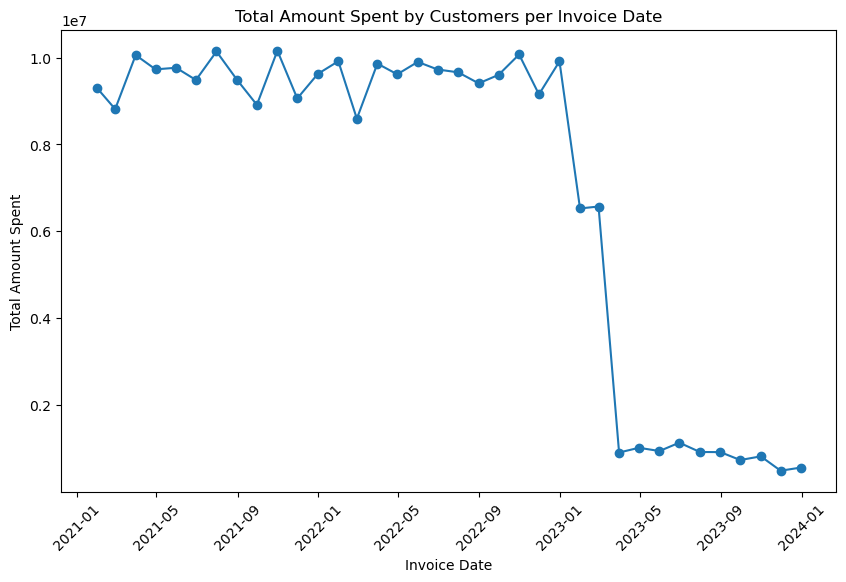

In [59]:

import matplotlib.pyplot as plt

df['invoice_date'] = pd.to_datetime(df['invoice_date'])

grouped_dfa = df.groupby(pd.Grouper(key='invoice_date', freq='M')).apply(lambda x: (x['price'] * x['quantity']).sum())


plt.figure(figsize=(10, 6))
plt.plot(grouped_dfa.index, grouped_dfa.values, marker='o')


plt.xlabel('Invoice Date')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent by Customers per Invoice Date')


plt.xticks(rotation=45)


plt.show()


In [36]:
merged_pd = pd.merge(json_df, df, left_on='id', right_on='customer_id', how='left')
sorted_df = merged_pd.groupby(['category', pd.cut(merged_pd['age'], [10, 20, 30, 40, 50, 60, 70, 80, 90])]).sum()
sorted2_df = sorted_df[['quantity']]

pivot_table = pd.pivot_table(sorted2_df, values='quantity', index='category', columns='age', aggfunc=sum, fill_value=0)
print(pivot_table)


pd.set_option('display.max_rows', None)

age              (10, 20]  (20, 30]  (30, 40]  (40, 50]  (50, 60]  (60, 70]  \
category                                                                      
Books                 351      1443      1522      1471      1438      1354   
Clothing             2722      9233     10391      9996      9802      9080   
Cosmetics            1178      3999      4865      4382      4214      3990   
Food & Beverage      1067      3929      4651      4443      4106      3968   
Shoes                 638      2810      3181      3035      2832      2471   
Souvenir              458      1267      1487      1488      1352      1215   
Technology            438      1313      1607      1518      1222      1386   
Toys                  748      2841      3259      2891      2747      2593   

age              (70, 80]  (80, 90]  
category                             
Books                1031       409  
Clothing             7154      3401  
Cosmetics            2884      1470  
Food & Beverage    

/var/folders/z8/7nx5cpqj5tn9sp0zw5wt78b80000gn/T/ipykernel_28707/290868078.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sorted_df = merged_pd.groupby(['category', pd.cut(merged_pd['age'], [10, 20, 30, 40, 50, 60, 70, 80, 90])]).sum()
